#Morphological Operation Surgery

Welcome to the "Morphological Operation Surgery" Python notebook. Here, we will explore morphological operations and powerful techniques used in image processing to manipulate and enhance images.

Morphological operations are essential for extracting features, reducing noise, and modifying object shape in images. This notebook will cover erosion, dilation, opening, closing, top hat, and black hat.

By mastering these techniques, you can selectively remove noise, enhance features, and achieve desired visual effects in your images. Whether you're working on denoising, edge detection, or object recognition, understanding and using these operations will be valuable in your image-processing tasks.

Get ready to dive into Morphological Operation Surgery, where we will explore these techniques and demonstrate their applications. Let's begin!


#Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.


In [1]:


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
# Importing the necessary Python packages

# We begin by installing the "pyheif" library using the pip package manager. This library enables us to work with HEIC image files.
#!pip install pyheif

#import pyheif  # Importing the pyheif library to handle HEIC files and convert them to more widely supported formats
import numpy as np  # Importing numpy for efficient numerical operations and array manipulation
from google.colab.patches import cv2_imshow  # Importing cv2_imshow from google.colab.patches to display images in Google Colab
from PIL import Image  # Importing PIL.Image for image processing capabilities
import cv2   # Importing cv2 from OpenCV for computer vision tasks
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating visualizations
import imutils  # Importing imutils for image resizing, rotating, and cropping
import os  # Importing os for interacting with the operating system, such as file handling and directory manipulation

# These imported packages will be essential for our image processing and computer vision tasks.

#Loading Image with OpenCV

When working with morphological operations in OpenCV, following a systematic approach to prepare and manipulate images is essential. It involves representing the image in binary or grayscale format. The image can be in RGB or BGR format initially. These necessary steps are crucial for the subsequent analysis and manipulation of the image.


(-0.5, 659.5, 557.5, -0.5)

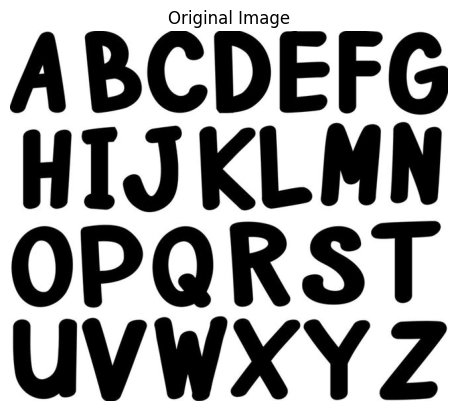

In [3]:
#read the image 
img = cv2.imread(r"/content/alphabet .jpg",0)


#disply the original image 
plt.imshow(img,cmap='gray')
#plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

#Morphological Operations

Morphological operations are essential to analyze and modify an image's shape and structure. They help with noise removal, edge detection, object segmentation, and more. These operations use structuring elements and pixel relationships in the image's neighbourhood.

To perform a morphological operation:


1.   Convert the image to grayscale.
2.   Apply binarization to convert the image to binary form.
3.   Choose the desired morphological operation.
4.   Analyze and manipulate the resulting image for your specific purpose.

In addition, image inversion is a valuable technique for enhancing features or changing the image's overall representation.

The provided code snippet converts the image to grayscale, performs binarization using Otsu's thresholding, inverts the binarized image, and displays the result.

(-0.5, 659.5, 557.5, -0.5)

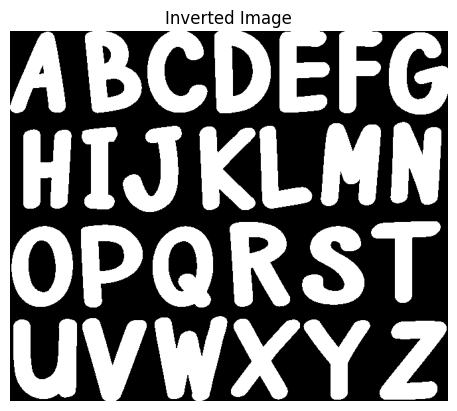

In [23]:

# Convert image to grayscale
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarization
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Define the kernel
kernel = np.ones((5, 5), np.uint8)

# Invert the image
invert = cv2.bitwise_not(binr)


#disply the inverted image 
plt.imshow(invert, cmap='gray')
plt.title("Inverted Image")
plt.axis("off")

##Erosion

Erosion is an essential image-processing operation that gradually removes pixels from object boundaries. It uses a small window called a kernel to analyze pixels. If all the pixels within the kernel belong to the object, the pixel being evaluated remains unchanged. However, if any pixels belong to the background, the pixel being considered changes to the background colour.

This iterative process erodes object boundaries, reducing the size and smoothing edges. Erosion is helpful for noise removal, object separation, and boundary detection in image processing.

The following code snippet will demonstrate how to use erosion with OpenCV's cv2.erode function. Increasing the number of erosion iterations will progressively remove more letters from the image, showcasing the erosion effect.

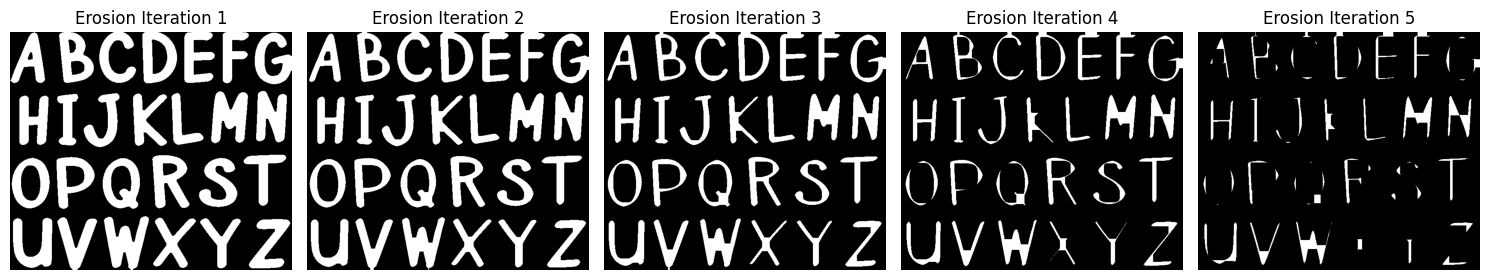

In [5]:

# Create subplots for displaying multiple images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Apply a series of erosion operations
for i in range(0, 5):
    eroded = cv2.erode(invert.copy(), kernel, iterations=i + 1)
  
    # Display the eroded image in a subplot
    axes[i].imshow(eroded, cmap='gray')
    axes[i].set_title(f'Erosion Iteration {i+1}')
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()


##Dilation

Dilation is the opposite of erosion in image processing. It expands the foreground pixels of objects in an image. In dilation, a kernel or structuring element moves over each pixel. If any pixel within the kernel's region is a foreground pixel, the evaluated pixel becomes a foreground pixel. This process enlarges objects and fills in gaps or holes.

Dilation enhances object features, fills gaps, connects lines or edges, and enlarges objects in an image. By understanding the complementary relationship between erosion and dilation, we can effectively manipulate and enhance images according to our needs.

The code below demonstrates the progressive effect of dilation as the number of iterations increases. Each subplot shows the image after a specific number of dilation operations.

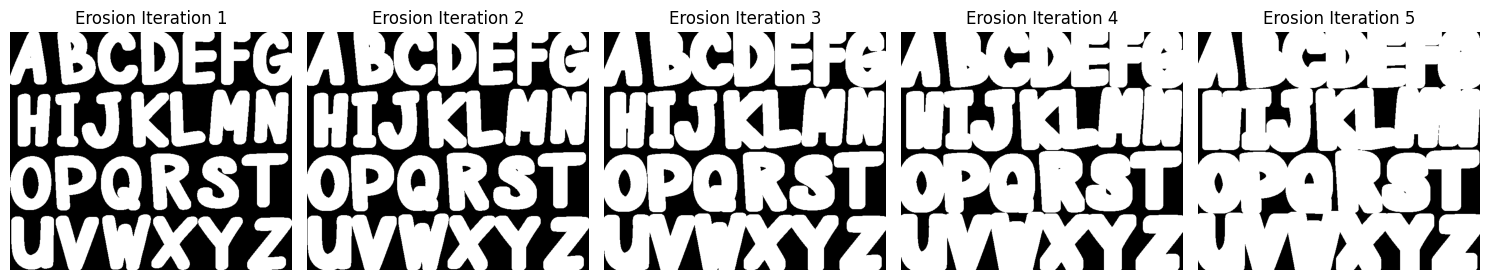

In [6]:
# Create subplots for displaying multiple images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Apply a series of erosion operations
for i in range(0, 5):
    dilated = cv2.dilate(invert.copy(), kernel, iterations=i + 1)
  
    # Display the eroded image in a subplot
    axes[i].imshow(dilated, cmap='gray')
    axes[i].set_title(f'Erosion Iteration {i+1}')
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()

##Opening 

The opening operation in image processing consists of two essential steps: erosion and dilation. It is primarily employed to eliminate noise and small details from binary images and to enhance edges in grayscale images.

The input image is convolved with a structuring element, a binary or grayscale image to perform the opening operation. This structuring element defines the neighbourhood shape and size used during the process.

During the erosion step of the opening operation, small foreground regions are removed, and the size of significant areas is reduced by shrinking them towards the background. This is achieved by replacing each pixel in the image with the minimum pixel value within its neighbourhood, as defined by the structuring element.

After erosion, the resulting eroded image undergoes the dilation step, which expands the remaining foreground regions. In dilation, each pixel in the eroded image is replaced with the maximum pixel value within its neighbourhood. This process helps restore the size of the remaining foreground regions while maintaining their shape and connectivity.

By applying erosion before dilation, the opening operation effectively removes slight noise and fine details while preserving the image's overall structure and more prominent features. This operation finds applications in tasks such as image denoising, edge enhancement, and object detection.







In the provided code, we have implemented the opening operation using the OpenCV library in Python to demonstrate its effects on a noisy image. The opening operation consists of two key steps: erosion and dilation.

To begin, we generate a white noise image by randomly assigning pixel values of either 0 or 255. This creates a binary image with random noise. We then display the white noise image to visualize the initial noisy state.



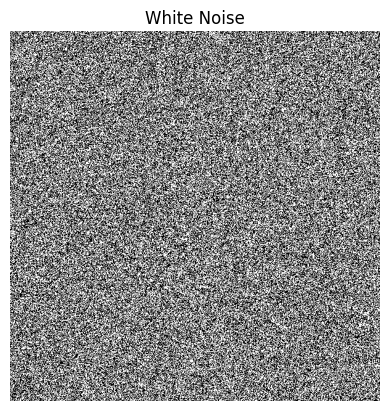

In [28]:
# Generate white noise
white_noise = np.random.randint(low=0, high=2, size=(600, 600)) * 255

# Display the white noise image
plt.imshow(white_noise, cmap='gray')
plt.title('White Noise')
plt.axis('off')
plt.show()

Next, we create an inverted image by subtracting each pixel value from 255. This results in an image with the opposite intensities, allowing us to emphasize the noise-free areas during the opening operation.

A mask is generated by creating a black image and adding the' OpenCV' text. The mask defines the areas where the noise will be eliminated, leaving only the text visible.

We apply the mask to the inverted image using a bitwise AND operation, effectively removing the noise from the areas specified by the mask. The result is a noisy image with the embedded text intact.




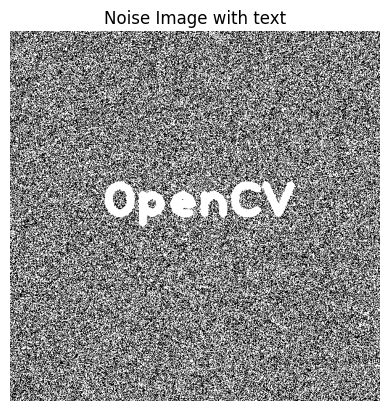

In [29]:
# Generate inverted image
invert_noise = 255 - white_noise

# Generate mask
mask = np.zeros((600, 600), dtype=np.uint8)
cv2.putText(mask, 'OpenCV', (150, 300), cv2.FONT_HERSHEY_PLAIN, 5, 255, 10, cv2.LINE_AA)

# Apply mask to the inverted image
masked_invert = cv2.bitwise_and(invert_noise, invert_noise, mask=mask)

# Add white noise and masked inverted image
noise_img = white_noise + masked_invert

# Display the noise image with the text
plt.imshow(noise_img, cmap='gray')
plt.title('Noise Image with text')
plt.axis('off')
plt.show()

Subsequently, we define different kernel sizes, representing the shape and size of the structuring element used in morphological operations. These kernel sizes will affect the extent of noise removal and feature preservation.

We convert the noisy image to an 8-bit unsigned integer format to ensure compatibility with OpenCV functions.

We perform morphological opening on the noisy image using the defined kernel sizes. The opening operation applies erosion to remove small details and noise while preserving the overall structure. It is then followed by dilation to restore the size of the remaining features while maintaining their shape and connectivity.

Finally, we display the original noisy image along with the results of the opening operation for each kernel size. This allows us to observe how different kernel sizes impact noise removal and feature preservation in the final images.

By experimenting with different kernel sizes and understanding the opening operation, we can effectively reduce noise, enhance essential features, and improve the quality of images in various image processing applications.


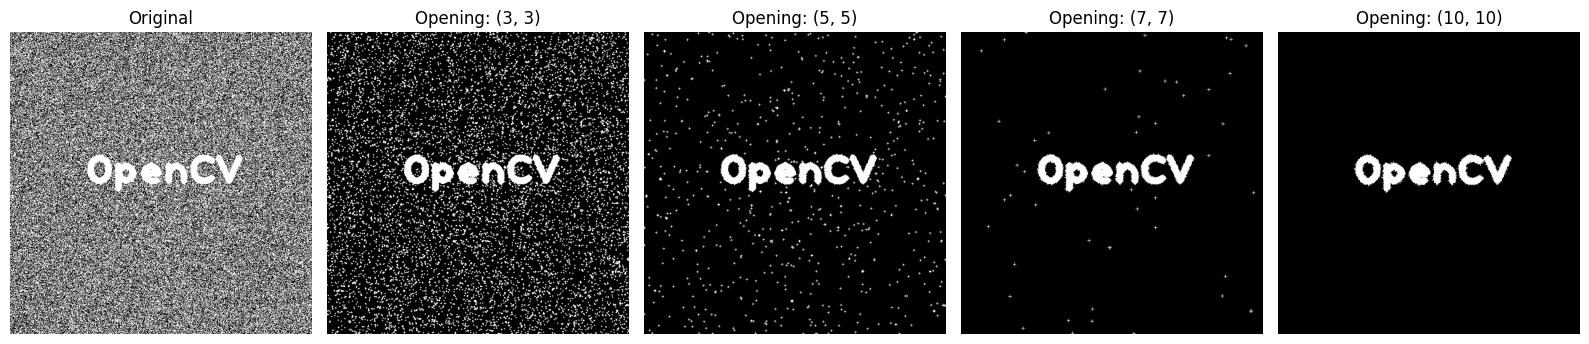

In [30]:
# Define the kernel sizes
kernel_sizes = [(3, 3), (5, 5), (7, 7), (10, 10)]

# Convert noise_img to 8-bit unsigned integer
noise_img = noise_img.astype(np.uint8)

# Create a subplot grid
fig, axs = plt.subplots(1, len(kernel_sizes) + 1, figsize=(16, 4))

# Plot the original image
axs[0].imshow(noise_img, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

# Apply morphological opening for each kernel size and plot the result
for i, kernel_size in enumerate(kernel_sizes):
    # Get the kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernel_size)

    # Apply morphological opening
    opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
    
    # Plot the result in the corresponding subplot
    axs[i + 1].imshow(opening, cmap='gray')
    axs[i + 1].set_title('Opening: {}'.format(kernel_size))
    axs[i + 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#Closing 

A closing operation can be seen as the reverse of an opening operation. In closing, the sequence of operations is reversed, starting with dilation and followed by erosion.

As the name implies, a closing operation is employed to fill holes within objects or to join separate components together.

The code snippet provided below demonstrates the implementation of a closing operation.




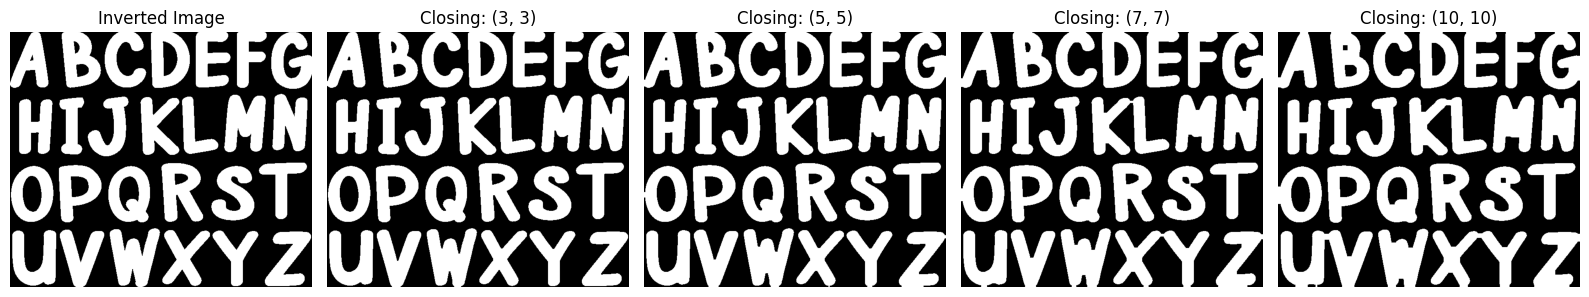

In [25]:



# Define the kernel sizes
kernelSizes = [(3, 3), (5, 5), (7, 7), (10, 10)]

# Create a subplot grid
fig, axs = plt.subplots(1, len(kernelSizes) + 1, figsize=(16, 4))

# Plot the inverted image
axs[0].imshow(invert,cmap='gray')
axs[0].set_title('Inverted Image')
axs[0].axis('off')

# Apply morphological closing for each kernel size and plot the results
for i, kernelSize in enumerate(kernelSizes):
    # Get the kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernelSize)
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)

    # Apply morphological closing
    closing = cv2.morphologyEx(invert, cv2.MORPH_CLOSE, kernel)

    # Plot the result in the corresponding subplot
    axs[i + 1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
    axs[i + 1].set_title('Closing: {}'.format(kernelSize))
    axs[i + 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Another illustration showcases the application of the opening and closing operations on a grayscale image.

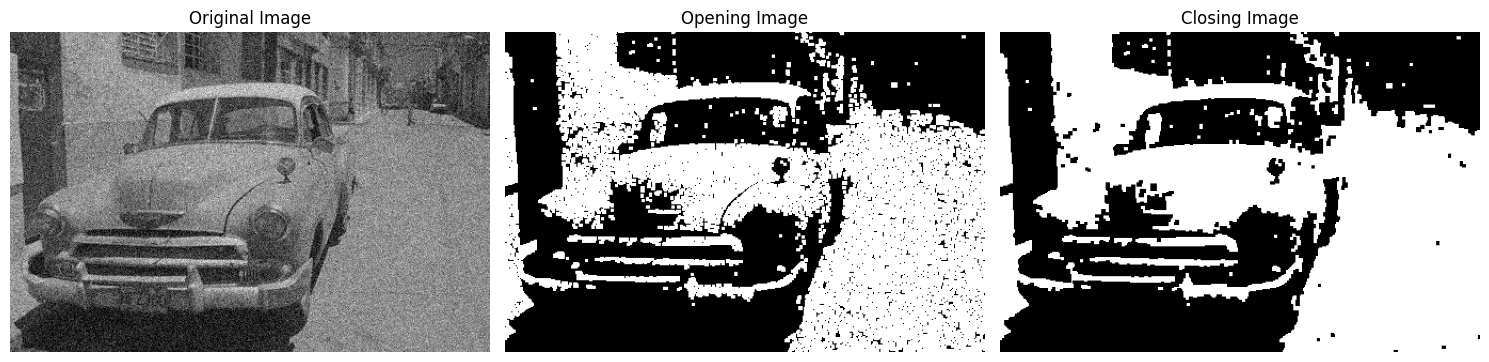

In [13]:


# Read the noisy image as grayscale (0)
noise_img = cv2.imread(r"/content/noise.png", 0)

# Binarize the image
_, bin_img = cv2.threshold(noise_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define the kernel
kernel = np.ones((3, 3), np.uint8)

# Opening the image
opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=1)

# Closing the image
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=1)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the original image
axes[0].imshow(noise_img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Plot the opening image
axes[1].imshow(opening, cmap='gray')
axes[1].set_title("Opening Image")
axes[1].axis("off")

# Plot the closing image
axes[2].imshow(closing, cmap='gray')
axes[2].set_title("Closing Image")
axes[2].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


#Morphological gradient

The morphological gradient refers to the difference between the dilation and erosion of an image using a specific structuring element. It highlights the boundaries and edges of objects in the image.

The code snippet provided below demonstrates the implementation of a morphological gradient.

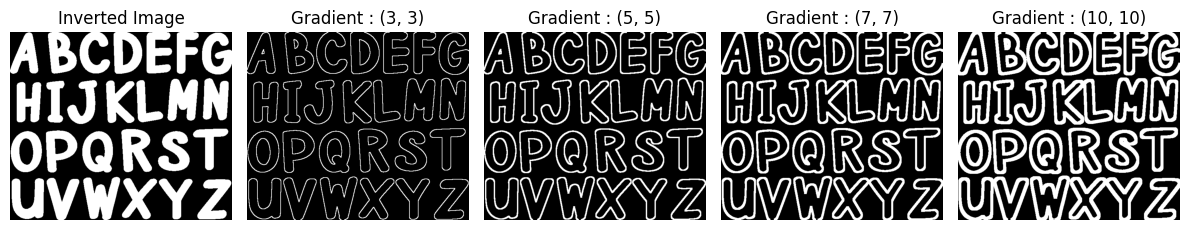

In [27]:
# Define the kernel sizes
kernelSizes = [(3, 3), (5, 5), (7, 7),(10,10)]



# Create a subplot grid
fig, axs = plt.subplots(1, len(kernelSizes) + 1 , figsize=(12, 4))

# Plot the original image
axs[0].imshow(invert,cmap='gray')
axs[0].set_title('Inverted Image')
axs[0].axis('off')

# Apply morphological gradient  for each kernel size and plot the result
for i, kernelSize in enumerate(kernelSizes):
    # Get the kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    
    # Apply morphological gradient 
    gradient  = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)
    
    # Plot the result in the corresponding subplot
    axs[i + 1 ].imshow(gradient , cmap='gray')
    axs[i + 1].set_title('Gradient : {}'.format(kernelSize))
    axs[i + 1 ].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Top hat (white hat) & black hat

The top hat operation, or white hat, is a morphological operation that highlights bright structures or details in an image. It is achieved by subtracting the image's opening from the original, emphasising regions brighter than their surroundings.

On the other hand, the black hat operation is a morphological operation that highlights dark structures or details in an image. It is obtained by subtracting the original image from its closing, emphasising regions darker than their surroundings.

The top hat and black hat operations help extract specific features or anomalies from an image, such as small objects or areas of interest that differ in brightness compared to the background.

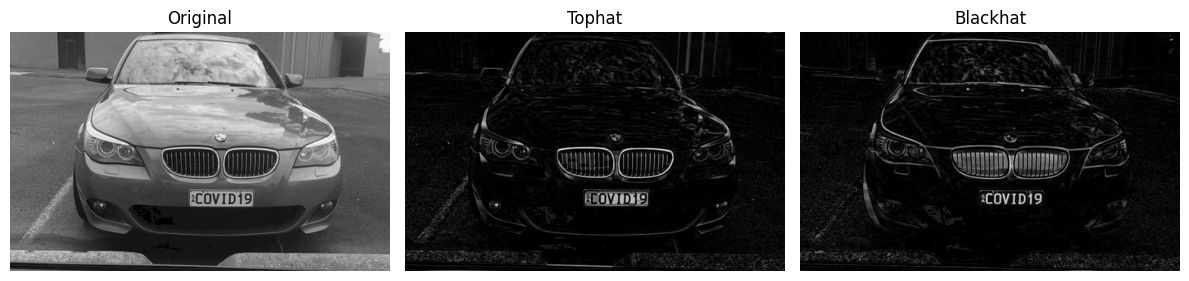

In [32]:
# Read the license plate image as grayscale
licence_plate_gray = cv2.imread("/content/licence plate.png", 0)

# Convert the image to color for plotting purposes
#licence_plate_color = cv2.cvtColor(licence_plate_gray, cv2.COLOR_GRAY2BGR)

# construct a rectangular kernel (13x5) and apply a blackhat
# operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

# Apply blackhat operation
blackhat = cv2.morphologyEx(licence_plate_gray, cv2.MORPH_BLACKHAT, rectKernel)

# Apply tophat operation
tophat = cv2.morphologyEx(licence_plate_gray, cv2.MORPH_TOPHAT, rectKernel)

# Create a subplot grid with three plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the original image
axs[0].imshow(licence_plate_gray, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

# Plot the tophat image
axs[1].imshow(tophat, cmap='gray')
axs[1].set_title('Tophat')
axs[1].axis('off')

# Plot the blackhat image
axs[2].imshow(blackhat, cmap='gray')
axs[2].set_title('Blackhat')
axs[2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#refranses 


*   https://www.geeksforgeeks.org/python-opencv-morphological-operations/
*   https://medium.com/jungletronics/opencv-morphological-operations-54f861eeb532
*  https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/?_ga=2.12165175.2001565853.1685619977-1664772421.1674074395


